In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

%cd /content/drive/MyDrive/Github/ERA-v1/S7

/content/drive/MyDrive/Github/ERA-v1/S7


In [3]:
%ls

model.py  Net1.ipynb  __pycache__/  utils.py


In [4]:
!git pull

error: You have not concluded your merge (MERGE_HEAD exists).
hint: Please, commit your changes before merging.
fatal: Exiting because of unfinished merge.


CODE BLOCK: 1

In [3]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [6]:
!pip install torchsummary
from torchsummary import summary
import torch
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
device=torch.device("mps")
model = Net()#.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 20, 22, 22]           1,820
              ReLU-8           [-1, 20, 22, 22]               0
       BatchNorm2d-9           [-1, 20, 22, 22]              40
           Conv2d-10           [-1, 10, 11, 11]             210
             ReLU-11           [-1, 10, 11, 11]               0
      BatchNorm2d-12           [-1, 10, 11, 11]              20
           Conv2d-13             [-1, 10, 9, 9]             910
             ReLU-14             [-1, 1

In [7]:
model = Net().to(device)

CODE BLOCK: 3

In [8]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [9]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100.0%


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100.0%


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [10]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

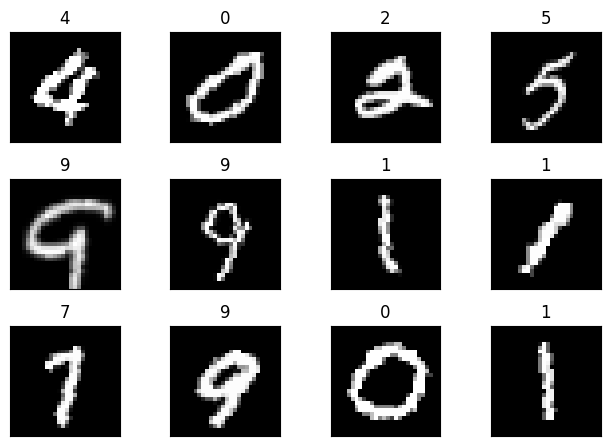

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [13]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.1639 Batch_id=117 Accuracy=87.55: 100%|██████████| 118/118 [00:28<00:00,  4.13it/s]


Test set: Average loss: 0.1122, Accuracy: 9769/10000 (97.69%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0651 Batch_id=117 Accuracy=96.71: 100%|██████████| 118/118 [00:25<00:00,  4.58it/s]


Test set: Average loss: 0.0784, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0925 Batch_id=117 Accuracy=97.48: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0677, Accuracy: 9838/10000 (98.38%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0898 Batch_id=117 Accuracy=97.73: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]


Test set: Average loss: 0.0563, Accuracy: 9853/10000 (98.53%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.1132 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:26<00:00,  4.53it/s]


Test set: Average loss: 0.0526, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 6


Train: Loss=0.0766 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:33<00:00,  3.57it/s]


Test set: Average loss: 0.0351, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 7


Train: Loss=0.0641 Batch_id=117 Accuracy=98.54: 100%|██████████| 118/118 [00:26<00:00,  4.45it/s]


Test set: Average loss: 0.0348, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 8


Train: Loss=0.0396 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:26<00:00,  4.45it/s]


Test set: Average loss: 0.0329, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 9


Train: Loss=0.0783 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:28<00:00,  4.17it/s]


Test set: Average loss: 0.0328, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 10


Train: Loss=0.0630 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:26<00:00,  4.48it/s]


Test set: Average loss: 0.0330, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 11


Train: Loss=0.1014 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:26<00:00,  4.43it/s]


Test set: Average loss: 0.0329, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 12


Train: Loss=0.0973 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]


Test set: Average loss: 0.0325, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 13


Train: Loss=0.0317 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]


Test set: Average loss: 0.0324, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 14


Train: Loss=0.0327 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]


Test set: Average loss: 0.0323, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 15


Train: Loss=0.0326 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]


Test set: Average loss: 0.0324, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 5.0000e-05.


**Target**
1. Set up a model structure
2. Basic code from the previous exercise
3. CenterCrop as transform

**Results**
1. Train Acc: 99.31
2. Test Acc: 99.44
3. Parameters: 20k

**Analysis**
1. The model is under-fitting without any drop-out, our transform seems to be doing a good job making the training hard.
2. Let's see what the model can do with the least parameters setup.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()

# Git Push

In [ ]:
!git add .

In [ ]:
!git config --global user.email "me18b059@smail.iitm.ac.in"
!git commit -m Final

In [ ]:
!git push